In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0206/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
# work for files 604, and 659 were missing from the submitted jobs - these were later re-run again individually. 659 worked fine. for 604, it worked when the seed was changed

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 441 ms, sys: 7.6 ms, total: 449 ms
Wall time: 450 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.000668,-0.007574,0.687456,0.004151,0.002492,0.062060,0.026866,-0.034676,0.387143,0.094574,...,0.0,-0.002634,0.0,0.004338,0.0,-0.007307,0.0,0.000937,0.0,-0.004733
1,0.000000,-0.013780,0.000078,-0.008567,0.402709,0.063646,0.004043,-0.010617,0.000066,0.094666,...,0.0,-0.006704,0.0,0.000421,0.0,-0.007599,0.0,0.020952,0.0,-0.000377
2,0.000000,-0.008464,0.000322,-0.009581,0.679359,0.051287,0.004485,-0.011375,0.000000,0.103627,...,0.0,-0.004567,0.0,-0.006995,0.0,-0.012070,0.0,0.006679,0.0,-0.002858
3,0.000000,0.000206,0.007729,-0.007301,0.014685,0.036077,0.000000,0.004675,0.000000,0.109277,...,0.0,0.001867,0.0,0.002079,0.0,-0.000253,0.0,0.010190,0.0,-0.000558
4,0.000000,-0.004801,0.000000,-0.010896,0.000000,0.070642,0.000000,0.007973,0.000000,0.100701,...,0.0,0.006470,0.0,-0.001759,0.0,0.002579,0.0,-0.002977,0.0,0.000461


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.000668,0.687456,0.002492,0.026866,0.387143,0.000002,0.000000,0.0,0.0,0.0,...,0.000000,1.226370e-09,0.002225,0.000288,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000078,0.402709,0.004043,0.000066,0.008003,0.000001,0.0,0.0,0.0,...,0.000037,5.286380e-02,0.000137,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000322,0.679359,0.004485,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.007729,0.014685,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,7.707239e-08,0.131036,0.017958,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.031102,0.437271,0.000003,0.0,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,6.682041e-04,0.988650,2.495526e-03,0.027230,0.472768,0.000002,0.000000,0.0,0.0,0.0,...,0.000000,1.226370e-09,2.227803e-03,2.883206e-04,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
1,0.000000e+00,0.000078,4.958717e-01,0.004051,0.000066,0.008035,0.000001,0.0,0.0,0.0,...,0.000037,5.428604e-02,1.370275e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
2,0.000000e+00,0.000322,9.726130e-01,0.004495,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
3,0.000000e+00,0.007759,1.479291e-02,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,7.707239e-08,1.400083e-01,1.811978e-02,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
4,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000e+00,3.159044e-02,5.484760e-01,2.873991e-06,0.000000e+00,0.0,0.0,0.0,0.0
5,1.246630e-08,0.000005,3.337987e-09,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,3.859115e-10,1.236968e-05,2.854084e-07,0.0,0.0,0.0,0.0
6,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000e+00,2.219768e-07,3.284285e-04,8.290115e-07,0.000000e+00,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    40.999838
1    41.998811
2    39.000067
3    32.000003
4    25.000352
5    23.000040
6    18.000000
dtype: float64

In [26]:
%%time
catch_all_averaged_preds = []
for i in range(910):
    file_name = "all_forecasts_sub_" + str(i) + '.npy'
    al_forecasts_npy_file = np.load(os.path.join(path_to_dfs, file_name))
    # make the conversion
    sub_window_forecasts = np.exp(al_forecasts_npy_file) - 1
    # get rid of anything below zero?
    # sub_window_forecasts[sub_window_forecasts < 0] = 0
    # get averages over time 
    sub_window_forecasts_averaged = np.mean(sub_window_forecasts, axis = (0,1))
    catch_all_averaged_preds.append(sub_window_forecasts_averaged)    

CPU times: user 145 ms, sys: 38.9 ms, total: 184 ms
Wall time: 184 ms


In [27]:
len(catch_all_averaged_preds)

910

In [28]:
catch_all_averaged_preds[0]

array([-0.00728263, -0.01333199, -0.00838003,  0.00025374, -0.0047664 ,
        0.00473321,  0.00389527], dtype=float32)

In [29]:
# make this a dataframe

In [30]:
Forecasted_values_df = pd.DataFrame(catch_all_averaged_preds).T

In [31]:
Forecasted_values_df.shape

(7, 910)

In [32]:
sum_forecasted_values = Forecasted_values_df.sum(axis = 1)

In [33]:
sum_forecasted_values

0    22.270000
1    25.574518
2    27.256592
3    23.011646
4    19.830219
5    26.386818
6    23.064375
dtype: float32

In [34]:
# These results are absurd, let's stick to what we had done before, we can justify that, this is what we did for comps as well

In [35]:
# concatenate the sum dataframes
block_0206_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0206_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0206_true_and_forecasted_values_df

,True_count,Forecasted_count
0,40.999838,22.270000
1,41.998811,25.574518
2,39.000067,27.256592
3,32.000003,23.011646
4,25.000352,19.830219
5,23.000040,26.386818
6,18.000000,23.064375


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

11.358523633071501

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

9.929606964426442

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.2883733857765963, pvalue=0.5305412675047193)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-0.6311034458884233

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.mean(np.exp(load_file)-1, axis = 1)
    loaded_npy_files.append(mean_file)

CPU times: user 242 ms, sys: 52.6 ms, total: 294 ms
Wall time: 295 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[-1.7763823e-03, -3.9327890e-03, -1.5219450e-03, ...,
        -3.7419647e-03,  2.8203279e-03,  2.0328462e-03],
       [ 2.3543835e-05, -4.5082718e-03, -2.3808926e-03, ...,
        -4.1625649e-03,  4.5889020e-03,  1.6327649e-03],
       [ 5.1604211e-04, -5.1903278e-03, -2.3286045e-03, ...,
        -3.8702935e-03,  3.9034486e-03,  1.4922619e-03],
       ...,
       [-1.1929557e-02, -1.3267562e-02, -9.4284415e-03, ...,
        -3.4615546e-03,  8.9257658e-03,  5.9079379e-03],
       [-1.1837766e-02, -1.2154937e-02, -8.3476007e-03, ...,
        -3.5552382e-03,  7.9717636e-03,  5.7277679e-03],
       [-1.1765033e-02, -1.1313841e-02, -9.0433061e-03, ...,
        -4.3431818e-03,  7.1798265e-03,  6.1316192e-03]], dtype=float32)

In [51]:
# %%time
# # convert less than 0 entries to 0 for all arrays
# for arr in loaded_npy_files:
#     arr[arr < 0] = 0

In [52]:
loaded_npy_files[0]

array([[-1.7763823e-03, -3.9327890e-03, -1.5219450e-03, ...,
        -3.7419647e-03,  2.8203279e-03,  2.0328462e-03],
       [ 2.3543835e-05, -4.5082718e-03, -2.3808926e-03, ...,
        -4.1625649e-03,  4.5889020e-03,  1.6327649e-03],
       [ 5.1604211e-04, -5.1903278e-03, -2.3286045e-03, ...,
        -3.8702935e-03,  3.9034486e-03,  1.4922619e-03],
       ...,
       [-1.1929557e-02, -1.3267562e-02, -9.4284415e-03, ...,
        -3.4615546e-03,  8.9257658e-03,  5.9079379e-03],
       [-1.1837766e-02, -1.2154937e-02, -8.3476007e-03, ...,
        -3.5552382e-03,  7.9717636e-03,  5.7277679e-03],
       [-1.1765033e-02, -1.1313841e-02, -9.0433061e-03, ...,
        -4.3431818e-03,  7.1798265e-03,  6.1316192e-03]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[29.08741 , 31.295084, 33.307144, ..., 23.85776 , 24.066904,
        21.361998],
       [28.434633, 26.440716, 29.343796, ..., 22.589952, 30.327034,
        32.565582],
       [30.583076, 33.74229 , 34.840504, ..., 25.732126, 29.451654,
        24.07827 ],
       ...,
       [20.79452 , 30.083948, 30.637657, ..., 30.14169 , 36.425835,
        35.07379 ],
       [27.515783, 27.625744, 40.456432, ..., 36.156925, 33.99083 ,
        30.695312],
       [22.171091, 27.557701, 40.336258, ..., 29.938044, 38.059967,
        32.61318 ]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[29.08741 , 31.295084, 33.307144, ..., 23.85776 , 24.066904,
        21.361998],
       [28.434633, 26.440716, 29.343796, ..., 22.589952, 30.327034,
        32.565582],
       [30.583076, 33.74229 , 34.840504, ..., 25.732126, 29.451654,
        24.07827 ],
       ...,
       [20.79452 , 30.083948, 30.637657, ..., 30.14169 , 36.425835,
        35.07379 ],
       [27.515783, 27.625744, 40.456432, ..., 36.156925, 33.99083 ,
        30.695312],
       [22.171091, 27.557701, 40.336258, ..., 29.938044, 38.059967,
        32.61318 ]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[10.09986987],
       [13.91580901],
       [14.45283868],
       [ 9.80234554],
       [ 7.21813688],
       [13.86105444],
       [10.76651061]])

In [63]:
ui_train

array([[35.6802413 ],
       [38.55766783],
       [40.46055756],
       [37.26863003],
       [35.0553113 ],
       [41.63241472],
       [37.56639032]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

26.58637828826904

In [66]:
y_traina = block_0206_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[40.99983801],
       [41.99881064],
       [39.00006729],
       [32.00000348],
       [25.000352  ],
       [23.00003994],
       [17.99999959]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

0.7142857142857143

In [70]:
np.mean(output, axis = 0)

array([22.270014, 25.574526, 27.256592, 23.011635, 19.830221, 26.386808,
       23.064384], dtype=float32)

In [71]:
sum_forecasted_values

0    22.270000
1    25.574518
2    27.256592
3    23.011646
4    19.830219
5    26.386818
6    23.064375
dtype: float32

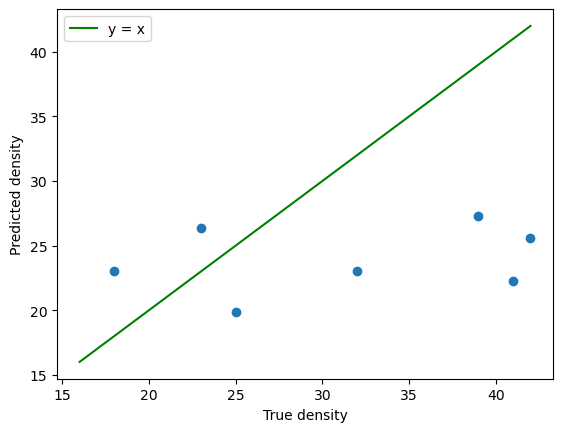

In [72]:
plt.scatter(block_0206_true_and_forecasted_values_df['True_count'], block_0206_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([16, 42], [16, 42], color='green', label='y = x')
plt.legend()
plt.show()

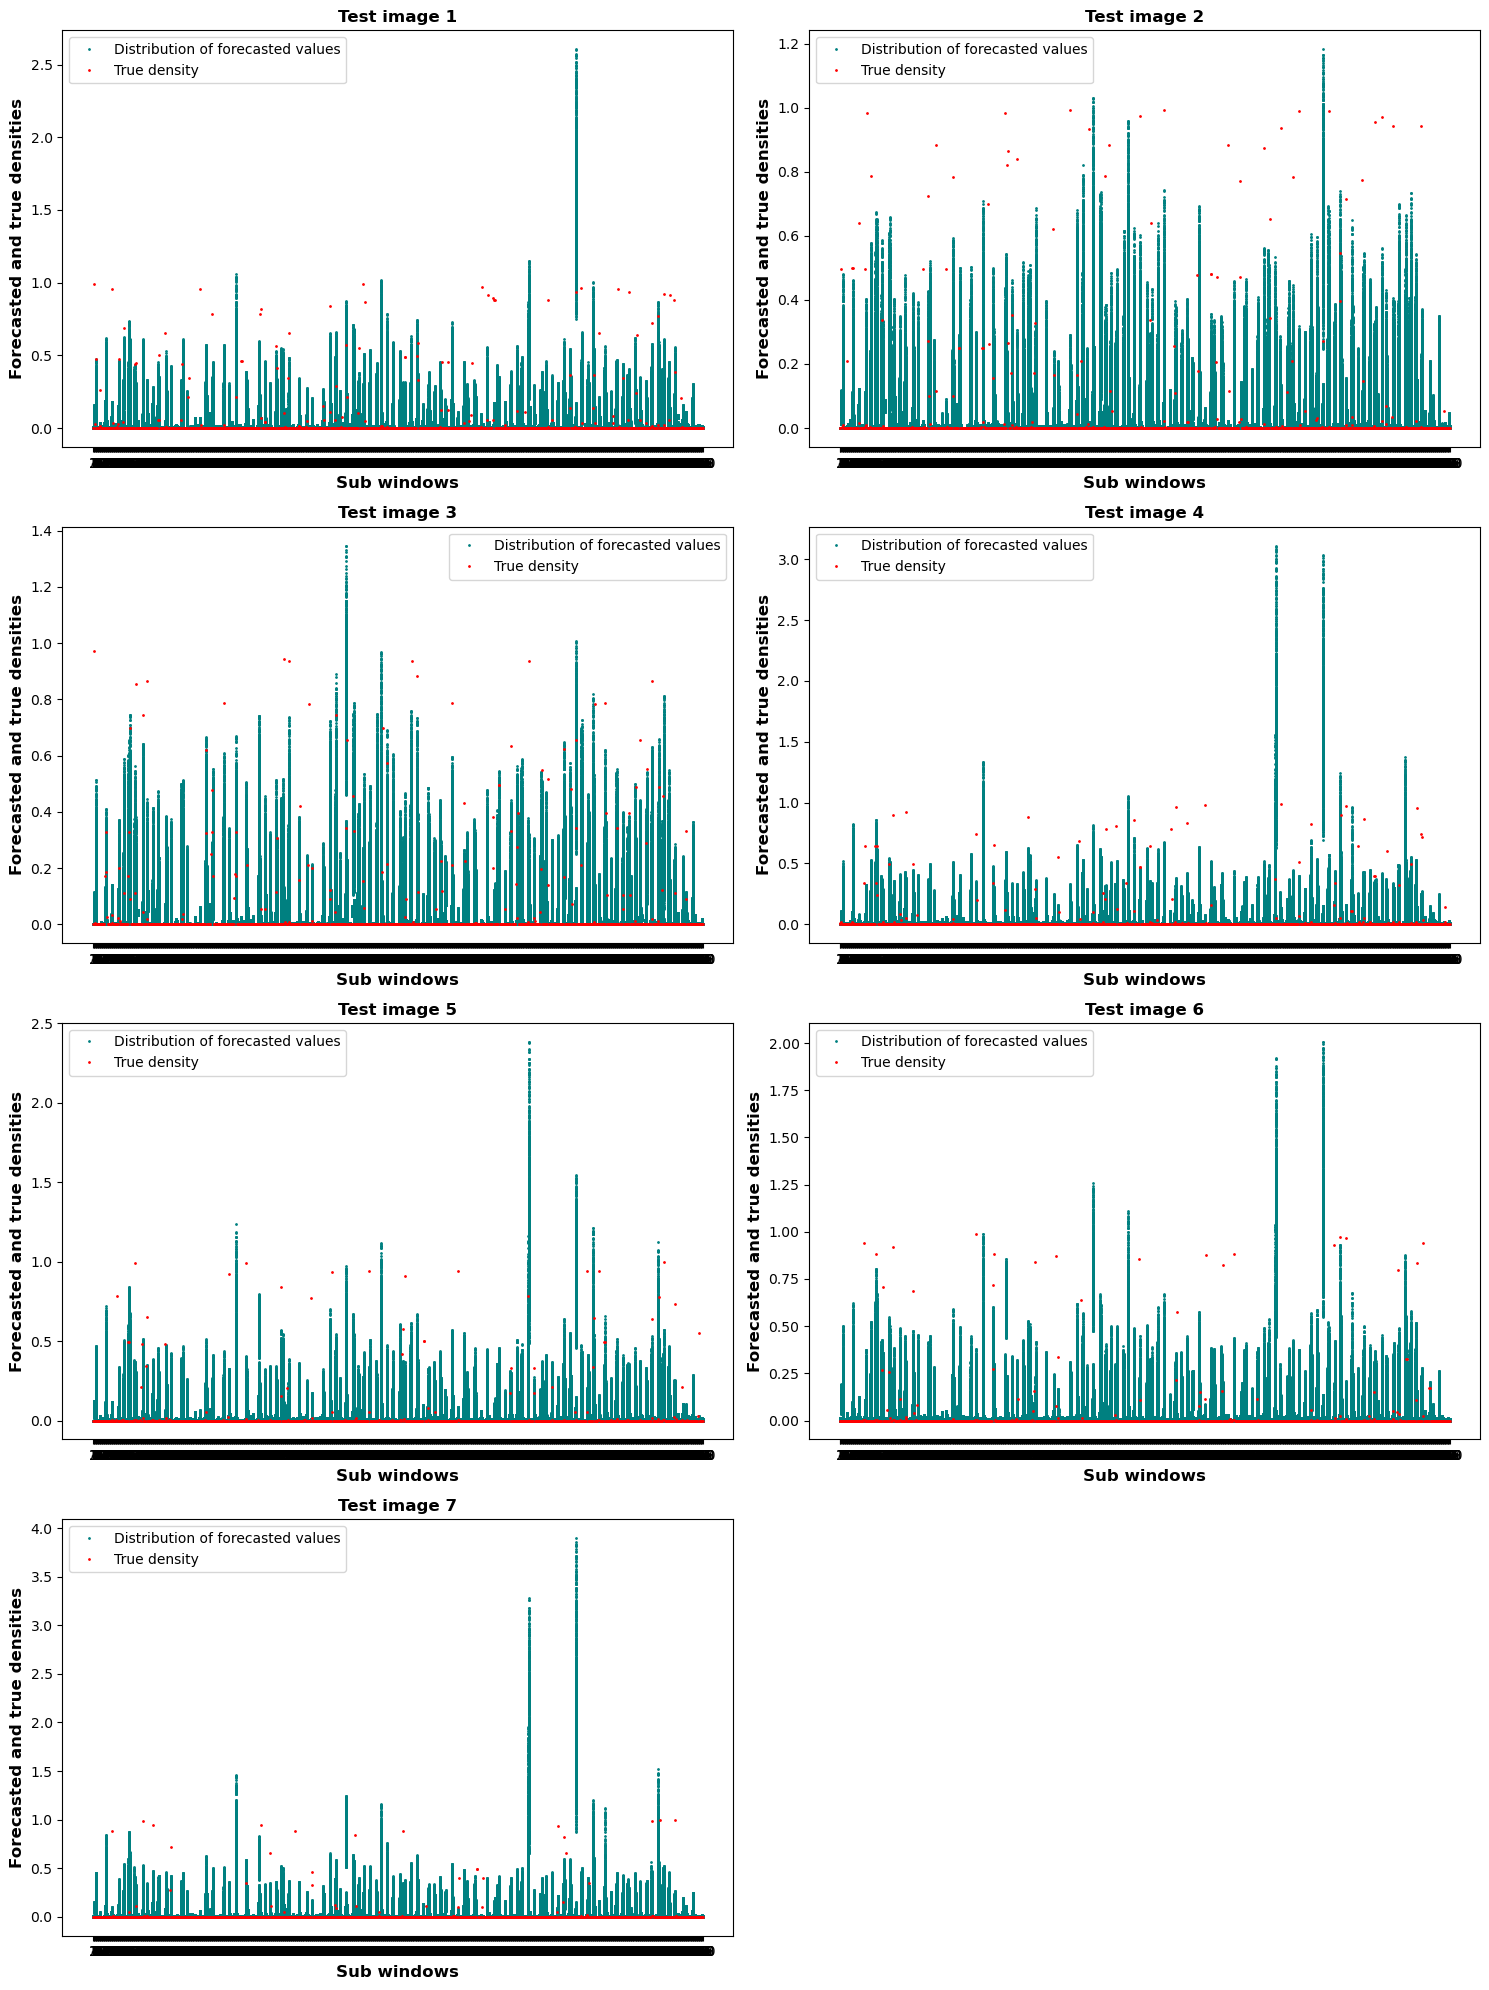

CPU times: user 27.1 s, sys: 849 ms, total: 27.9 s
Wall time: 27.5 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 